# Source of Alzheimer's MRI Scan Images Used for Model Training:

https://www.kaggle.com/datasets/yasserhessein/dataset-alzheimer?resource=download

In [ ]:
!unzip Alzheimers_Dataset.zip

In [1]:
#https://colab.research.google.com/drive/1fZUCc_MPPu6pcMYylnFNn7gn-umT5ZxH#scrollTo=9WJAHA7t8oCN
import torch
import sys

if torch.cuda.is_available():
    print("GPU is available!")
else:
    print("GPU is not available.")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Device:", device)

#File paths containing the training and testing data (images of individual MRI for different severity levels for Alzheimers)
if 'c:' in sys.path[0]:
    print(sys.path[0])
    train_path = "c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/train"
    test_path = "c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/test"
    model_save_location = "C:/Users/ricky/model_state.pt"

else:
    train_path = "/content/Alzheimers_Dataset/train"
    test_path = "/content/Alzheimers_Dataset/test"
    model_save_location = "/content/model_state.pt"

print(train_path)
print(test_path)
print(model_save_location)




GPU is not available.
Device: cpu
c:\Users\ricky
c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/train
c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/test
C:/Users/ricky/model_state.pt


In [2]:
%%time
#importing every library we will use for this project
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2 as cv

#Establishing connection with training and testing folders
train_files = os.listdir(train_path)
test_files = os.listdir(test_path)
# print(train_files)
# print(test_files)

#Establishing connection with the images contained in each class of folder
for f in range(len(train_files)):
    train_files[f]=train_path+"/"+train_files[f]
#     f=train_path + "/" + f
print(train_files)


for f in range(len(test_files)):
    test_files[f]=test_path+"/"+test_files[f]
#     f=train_path + "/" + f
print(test_files)

#Establishing connection with the images contained in each class of folder

#For the training images
training_images = []
for folders in train_files:
    print(folders.split('/')[-1])
    print(len(os.listdir(folders)))
    for images in range(len(os.listdir(folders))):
        #print(folders + "/" + os.listdir(folders)[images])
        training_images.append([folders.split('/')[-1], folders + "/" + os.listdir(folders)[images]])

    #print(os.listdir(folders))
#print(training_images)

#For the testing images
testing_images = []
for folders in test_files:
    print(folders.split('/')[-1])
    print(len(os.listdir(folders)))
    for images in range(len(os.listdir(folders))):
        #print(folders + "/" + os.listdir(folders)[images])
        testing_images.append([folders.split('/')[-1], folders + "/" + os.listdir(folders)[images]])

    #print(os.listdir(folders))
#print(testing_images)



['c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/train/MildDemented', 'c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/train/ModerateDemented', 'c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/train/NonDemented', 'c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/train/VeryMildDemented']
['c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/test/MildDemented', 'c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/test/ModerateDemented', 'c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/test/NonDemented', 'c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/test/VeryMildDemented']
MildDemented
717
ModerateDemented
52
NonDemented
2560
VeryMildDemented
1792
MildDemented
179
ModerateDemented
12
NonDemented
640
VeryMildDemented
448
CPU times: total: 22.5 s
Wall time: 23.8 s


In [ ]:
# print(testing_images)
# print(training_images)


c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/test/MildDemented/26 (19).jpg


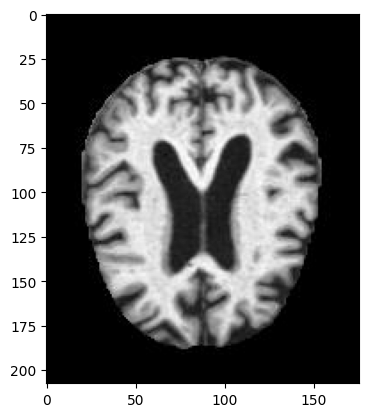

In [3]:

%matplotlib inline

#Prints an image from the testing section
print(testing_images[0][1])

img = cv.imread(testing_images[0][1],0)

#cv.imshow("Display window", img)
# cv.waitKey(0)
plt.imshow(img,cmap='gray')
plt.show()

['MildDemented', 'c:/Users/ricky/Desktop/Alzheimer_Resume_Project/Alzheimers_Dataset/train/MildDemented/mildDem118.jpg']


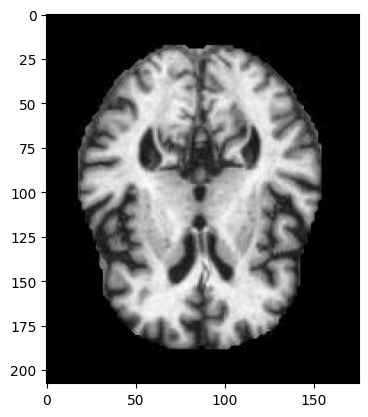

In [11]:
%matplotlib inline

#Prints an image from the training section

print(training_images[22]) #22

img = cv.imread(training_images[22][1],0)

#cv.imshow("Display window", img)
# cv.waitKey(0)
plt.imshow(img,cmap='gray')
plt.show()

In [12]:
# Given the filepaths for every image, these now need to be translated into numpy arrays,
# which are then converted into tensor data structures

#For computational efficiency, translating images to arrays based on grayscale is generally more computationally efficient
# In our use case, grayscale is also accurate to the original images, since MRI scans are already grayscale images

#Converting classes into integers, which can be referenced later and understood by the training model
classes = ["NonDemented", "VeryMildDemented", "MildDemented", "ModerateDemented"]

#Process training images into training data:
training_data = []
for files in training_images:
    image_read = cv.imread(files[1], 0)

    norm_read = (image_read - image_read.mean())/image_read.std() #Normalizes the input data read from the grayscale image range

    training_data.append((torch.from_numpy(np.expand_dims(norm_read, axis =0)), classes.index(files[0])))
    # print(files[0])
    # print(files[1])
# # training_data = np.asarray(training_data)
#training_data = torch.tensor(training_data)

testing_data = []
for files in testing_images:
    # testing_data.append((torch.from_numpy(np.expand_dims(cv.imread(files[1], 0), axis =0)), classes.index(files[0])))
    image_read = cv.imread(files[1], 0)

    norm_read = (image_read - image_read.mean())/image_read.std() #Normalizes the input data read from the grayscale image range

    testing_data.append((torch.from_numpy(np.expand_dims(norm_read, axis =0)), classes.index(files[0])))

    # print(files[0])
    # print(files[1])

print("Example of Training Data:")
print(training_data[0])

print("Example of Testing Data:")
print(testing_data[0])




Example of Training Data:
(tensor([[[-0.8462, -0.8462, -0.8462,  ..., -0.8462, -0.8462, -0.8462],
         [-0.8462, -0.8462, -0.8462,  ..., -0.8462, -0.8462, -0.8462],
         [-0.8462, -0.8462, -0.8462,  ..., -0.8462, -0.8462, -0.8462],
         ...,
         [-0.8462, -0.8462, -0.8462,  ..., -0.8462, -0.8462, -0.8462],
         [-0.8462, -0.8462, -0.8462,  ..., -0.8462, -0.8462, -0.8462],
         [-0.8462, -0.8462, -0.8462,  ..., -0.8462, -0.8462, -0.8462]]],
       dtype=torch.float64), 2)
Example of Testing Data:
(tensor([[[-0.8024, -0.8024, -0.8024,  ..., -0.8024, -0.8024, -0.8024],
         [-0.8024, -0.8024, -0.8024,  ..., -0.8024, -0.8024, -0.8024],
         [-0.8024, -0.8024, -0.8024,  ..., -0.8024, -0.8024, -0.8024],
         ...,
         [-0.8024, -0.8024, -0.8024,  ..., -0.8024, -0.8024, -0.8024],
         [-0.8024, -0.8024, -0.8024,  ..., -0.8024, -0.8024, -0.8024],
         [-0.8024, -0.8024, -0.8024,  ..., -0.8024, -0.8024, -0.8024]]],
       dtype=torch.float64), 2)

In [13]:
print("There are",len(training_data), "samples of training data with a tensor shape of", training_data[0][0].shape)
print()
print("There are",len(testing_data), "samples of testing data with a tensor shape of", testing_data[0][0].shape)


There are 5121 samples of training data with a tensor shape of torch.Size([1, 208, 176])

There are 1279 samples of testing data with a tensor shape of torch.Size([1, 208, 176])


In [15]:
# Batches are extracted from the testing and training data, as that can help reduce overfitting
# and help improve the overall efficiency of the model.

# defining the Training Dataset class
class train_data_set(Dataset):
    def __init__(self):
        numbers = training_data
        self.data = numbers

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]


training_dataset = train_data_set()

# defining the Testing Dataset class
class test_data_set(Dataset):
    def __init__(self):
        numbers = testing_data
        self.data = numbers

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]


testing_dataset = test_data_set()

# Implementing dataloader for each dataset
train_dataloader = DataLoader(training_dataset, batch_size=30, shuffle=True) #, shuffle=True
test_dataloader = DataLoader(testing_dataset, batch_size=30, shuffle=True)

print(train_dataloader)
print(test_dataloader)
print()

number_batches = 0
for i, batch in enumerate(test_dataloader):
    number_batches = i

print("There are a total of",number_batches, "batches of",test_dataloader.batch_size, "from the Testing Dataset")

for i, batch in enumerate(train_dataloader):
    number_batches = i

print("There are a total of",number_batches, "batches of",train_dataloader.batch_size, "from the Training Dataset")


There are a total of 42 batches of 30 from the Testing Dataset
There are a total of 170 batches of 30 from the Training Dataset


Now Training Epoch 0
Now validating at Epoch 0
Epoch:0 loss is 0.7818081974983215, Training Accuracy is  48.84% , Validation Accuracy is  56.84%
Now Training Epoch 1
Now validating at Epoch 1
Epoch:1 loss is 1.2431648969650269, Training Accuracy is  53.19% , Validation Accuracy is  57.23%
Now Training Epoch 2
Now validating at Epoch 2
Epoch:2 loss is 1.2234551906585693, Training Accuracy is  54.07% , Validation Accuracy is  61.22%
Now Training Epoch 3
Now validating at Epoch 3
Epoch:3 loss is 0.9846827983856201, Training Accuracy is  56.04% , Validation Accuracy is  57.47%
Now Training Epoch 4
Now validating at Epoch 4
Epoch:4 loss is 0.7262375950813293, Training Accuracy is  59.48% , Validation Accuracy is  60.67%
Now Training Epoch 5
Now validating at Epoch 5
Epoch:5 loss is 0.8493831157684326, Training Accuracy is  61.53% , Validation Accuracy is  63.02%
Now Training Epoch 6
Now validating at Epoch 6
Epoch:6 loss is 0.8985387682914734, Training Accuracy is  64.42% , Validation Accur

<Axes: title={'center': 'CNN Model Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>

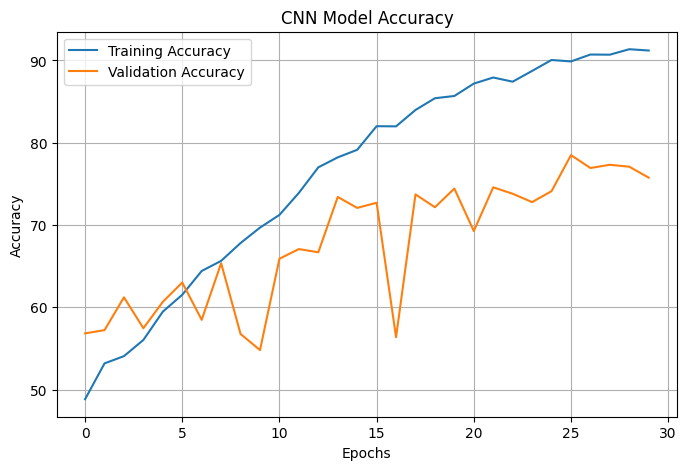

In [ ]:
%%time
#Now that the training and testing data are extracted into a useable format,
# we can begin to design the models that will be tested with this data
from torch.optim import Adam

# Convolutional Neural Network
class CCNImageClassifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, (3,3)),
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(32), #https://proceedings.mlr.press/v37/ioffe15.pdf
            torch.nn.ReLU(),

            torch.nn.Conv2d(32, 32, (3,3)),
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),

            torch.nn.MaxPool2d(3, stride=3),
            torch.nn.Conv2d(32, 64, (3,3)),
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),

            # torch.nn.MaxPool2d(2, stride=2),
            torch.nn.Conv2d(64, 64, (3,3)),
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),

            # torch.nn.Conv2d(64, 64, (3,3)),
            # torch.nn.ReLU(),
            # torch.nn.BatchNorm2d(64),
            torch.nn.MaxPool2d(3, stride=3),
            # torch.nn.BatchNorm2d(64),

            # torch.nn.Conv2d(64, 64, (3,3)),
            # torch.nn.ReLU(),
            # torch.nn.BatchNorm2d(64),
            # torch.nn.Conv2d(64, 64, (3,3)),
            # torch.nn.ReLU(),
            # torch.nn.BatchNorm2d(64),

            torch.nn.Flatten(),
            # torch.nn.Dropout(0.6),
            torch.nn.AlphaDropout(0.6), #https://arxiv.org/pdf/1706.02515.pdf
            torch.nn.Linear(64*21*17, 1000), #64*48*40
            torch.nn.ReLU(),
            torch.nn.AlphaDropout(0.6), #https://arxiv.org/pdf/1706.02515.pdf
            # # torch.nn.BatchNorm1d(30720),
            # # torch.nn.Linear(30720, 4000),
            # # torch.nn.ReLU(),
            # torch.nn.BatchNorm1d(100),
            # torch.nn.Dropout(0.5),

            # # torch.nn.Dropout(0.6),
            torch.nn.Linear(1000, 4)

        )

    def forward(self, x):
        return self.model(x)

# Instance of the  convolutional neural network, loss, optimizer
clf = CCNImageClassifier().to(device)
opt = Adam(clf.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

# Training flow
if __name__ == "__main__":
    #Keep track of classification accuracy and validation accuracy as training progresses
    Validation = []
    EpochAccuracy = []
    for epoch in range(30): # train for 25 epochs
        total_correct = 0
        total_samples = 0
        clf.train()

        if clf.training:
            # it's in train mode
            print("Now Training Epoch", epoch)
        else:
            # it's in eval mode
            print("Not Working")

        for batch in train_dataloader:
            X,y = batch
            X, y = X.float().to(device), y.to(device) #Input tensor values are translated to float variables to match bias variable type
            yhat = clf(X)
            loss = loss_fn(yhat, y)

            # Apply backprop
            opt.zero_grad()
            loss.backward()
            opt.step()

            # Calculate Classification Training Accuracy
            _, predicted = yhat.max(1)
            total_correct += (predicted == y).sum().item()
            total_samples += y.size(0)

        Accuracy = total_correct / total_samples *100
        EpochAccuracy.append(Accuracy)

        clf.eval()

        #Validation Tracking
        with torch.no_grad():  # deactivate autograd engine to reduce memory usage and speed up computations
            valid_correct = 0
            valid_samples = 0

            if clf.training:
            # it's in train mode
                print("Still Training, validation interference")
            else:
                print("Now validating at Epoch", epoch) #Confirms that validation data is not impacting training process
            # it's in eval mode


            for data in test_dataloader:
                X_valid,y_valid = data  # replace 'device' with your device, e.g., 'cuda' or 'cpu'
                X_valid, y_valid = X_valid.float().to(device), y_valid.to(device)

                valid_outputs = clf(X_valid)
                # Calculate Classification Training Accuracy
                _, valid_predicted = valid_outputs.max(1)
                valid_correct += (valid_predicted == y_valid).sum().item()
                valid_samples += y_valid.size(0)

            ValidationAccuracy = valid_correct / valid_samples *100
            Validation.append(ValidationAccuracy)


        print(f"Epoch:{epoch} loss is {loss.item()}, Training Accuracy is {Accuracy: .2f}% , Validation Accuracy is {ValidationAccuracy: .2f}%")


    torch.save(clf.state_dict(), model_save_location) #Saves model

import pandas as pd
print(Validation)
print(EpochAccuracy)
AccuracyTrack = pd.DataFrame({
    "Training Accuracy" : EpochAccuracy,
    "Validation Accuracy" : Validation,
})
AccuracyTrack.plot(y = ["Training Accuracy", "Validation Accuracy"],
                   title="CNN Model Accuracy", figsize= (8,5), kind = 'line', ylabel= 'Accuracy', xlabel = 'Epochs', grid = True)



Implement early stopping, based on visible validation accuracy training

Implement transfer learning with pretrained model, at some point

Automate Hyperparameter Tuning: Use tools like Grid Search or Random Search to automate the process of hyperparameter tuning. Libraries such as scikit-learn provide functions for hyperparameter optimization, and tools like Optuna can automate the search process.
https://www.youtube.com/watch?v=xP9l9MptIZo

In [ ]:
# torch.save(clf.state_dict(), "C:/Users/ricky/model_state.pt") #Saves model
torch.save(clf.state_dict(), model_save_location) #Saves model

In [17]:
# Shown below, this process reloads the model that has been previously trained

class CCNImageClassifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, (3,3)),
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(32), #https://proceedings.mlr.press/v37/ioffe15.pdf
            torch.nn.ReLU(),

            torch.nn.Conv2d(32, 32, (3,3)),
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),

            torch.nn.MaxPool2d(3, stride=3),
            torch.nn.Conv2d(32, 64, (3,3)),
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),

            # torch.nn.MaxPool2d(2, stride=2),
            torch.nn.Conv2d(64, 64, (3,3)),
            # torch.nn.ReLU(),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),

            # torch.nn.Conv2d(64, 64, (3,3)),
            # torch.nn.ReLU(),
            # torch.nn.BatchNorm2d(64),
            torch.nn.MaxPool2d(3, stride=3),
            # torch.nn.BatchNorm2d(64),

            # torch.nn.Conv2d(64, 64, (3,3)),
            # torch.nn.ReLU(),
            # torch.nn.BatchNorm2d(64),
            # torch.nn.Conv2d(64, 64, (3,3)),
            # torch.nn.ReLU(),
            # torch.nn.BatchNorm2d(64),

            torch.nn.Flatten(),
            # torch.nn.Dropout(0.6),
            torch.nn.AlphaDropout(0.5), #https://arxiv.org/pdf/1706.02515.pdf
            torch.nn.Linear(64*21*17, 1000), #64*48*40
            torch.nn.ReLU(),
            torch.nn.AlphaDropout(0.5), #https://arxiv.org/pdf/1706.02515.pdf
            # # torch.nn.BatchNorm1d(30720),
            # # torch.nn.Linear(30720, 4000),
            # # torch.nn.ReLU(),
            # torch.nn.BatchNorm1d(100),
            # torch.nn.Dropout(0.5),

            # # torch.nn.Dropout(0.6),
            torch.nn.Linear(1000, 4)

        )

    def forward(self, x):
        return self.model(x)

# Instance of the  convolutional neural network, loss, optimizer
clf = CCNImageClassifier().to(device)
# opt = Adam(clf.parameters(), lr=1e-3)
# loss_fn = torch.nn.CrossEntropyLoss()

#Later to restore model:
clf.load_state_dict(torch.load(model_save_location, map_location=torch.device(device)))
clf.eval()

CCNImageClassifier(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (14): Flatten(start_dim=1, end_dim=-1)
    (15): AlphaDropout(p=0.5, inplace=False)
    (16): Linear(in_features=22848, out_fe

# Training and Testing Accuracy

VeryMildDemented
1
tensor(0)
tensor([[  366.3178,    31.2519,  -448.1285, -1148.0370]])
torch.return_types.max(
values=tensor([366.3178]),
indices=tensor([0]))


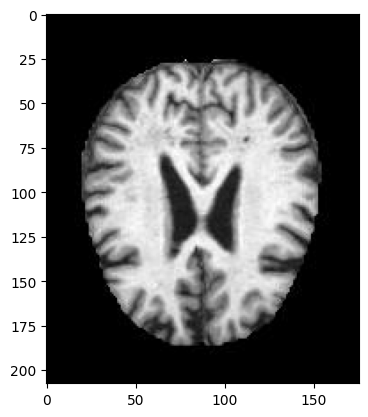

Training Accuracy = 99.92189025580942 %
Testing Accuracy = 75.76231430805316 %
CPU times: total: 8min 59s
Wall time: 2min 23s


In [18]:
%%time
classes = ["NonDemented", "VeryMildDemented", "MildDemented", "ModerateDemented"]

# Prediction for Single Selected Image
test_number = 1000

test_img = cv.imread(testing_images[test_number][1],0)

norm_read = (test_img - test_img.mean())/test_img.std() #Normalizes the input data read from the grayscale image range

test_tensor = ToTensor()(test_img).unsqueeze(0).to(device)

print(testing_images[test_number][0])
print(classes.index(testing_images[test_number][0]))

clf.eval()
with torch.no_grad():
    print(torch.argmax(clf(test_tensor)))
    print(clf(test_tensor))
    print(clf(test_tensor).max(1))

plt.imshow(test_img,cmap='gray')
plt.show()

#Tests accuracy with training data
with torch.no_grad():  # deactivate autograd engine to reduce memory usage and speed up computations
    total_correct = 0
    total_samples = 0
    for data in train_dataloader:
        X,y = data
        X, y = X.float().to(device), y.to(device)

        outputs = clf(X)
        # Calculate Classification Training Accuracy
        _, predicted = outputs.max(1)
        total_correct += (predicted == y).sum().item()
        total_samples += y.size(0)
        # print(total_correct/total_samples)
    Accuracy = total_correct / total_samples *100
    print("Training Accuracy =",Accuracy,"%")

#Tests accuracy for testing data
with torch.no_grad():  # deactivate autograd engine to reduce memory usage and speed up computations
    total_correct = 0
    total_samples = 0
    for data in test_dataloader:
        X,y = data  # replace 'device' with your device, e.g., 'cuda' or 'cpu'
        X, y = X.float().to(device), y.to(device)

        outputs = clf(X)
        # Calculate Classification Training Accuracy
        _, predicted = outputs.max(1)
        total_correct += (predicted == y).sum().item()
        total_samples += y.size(0)
        # print(total_correct/total_samples)
    Accuracy = total_correct / total_samples *100
    print("Testing Accuracy =",Accuracy, "%")




# Confusion Matrix for Testing Data

0
NonDemented
['VeryMildDemented' 'NonDemented' 'MildDemented' ... 'VeryMildDemented'
 'NonDemented' 'NonDemented']
['VeryMildDemented' 'NonDemented' 'VeryMildDemented' ...
 'VeryMildDemented' 'NonDemented' 'NonDemented']


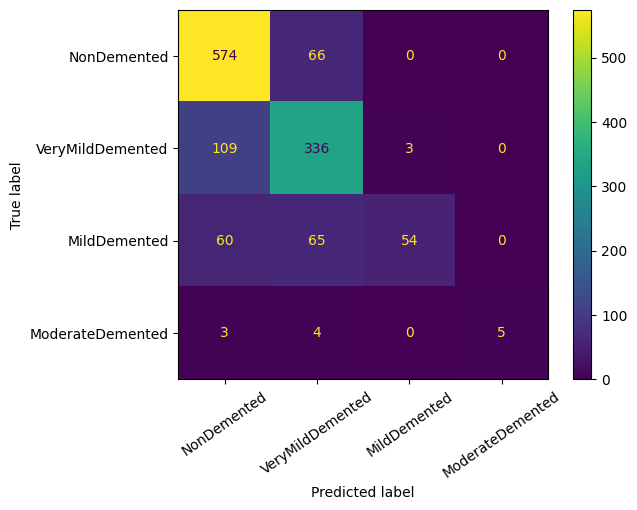

In [72]:
with torch.no_grad():  # deactivate autograd engine to reduce memory usage and speed up computations
    predictions_list = np.array([])
    total_samples_list = np.array([])
    for data in test_dataloader:
        X,y = data  # replace 'device' with your device, e.g., 'cuda' or 'cpu'
        X, y = X.float().to(device), y.to('cpu')
        total_samples_list = np.concatenate((total_samples_list, y.numpy()), axis=None)
        # print(total_samples_list)

        outputs = clf(X)
        _, predicted = outputs.max(1)
        predictions_list = np.concatenate((predictions_list, predicted.to('cpu').numpy()), axis=None)

total_samples_list=total_samples_list.astype(object)
predictions_list=predictions_list.astype(object)

#Constructs a Confusion Matrix
classes = ["NonDemented", "VeryMildDemented", "MildDemented", "ModerateDemented"]

print(classes.index("NonDemented"))
print(classes[classes.index("NonDemented")])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# y_test = np.array([0,1,2,3,1], dtype=object)
# predictions = np.array([0,1,2,3,0], dtype=object)
for n in range(4):
    total_samples_list[total_samples_list==n] = classes[n]
    predictions_list[predictions_list==n] = classes[n]

print(total_samples_list)
print(predictions_list)
cm = confusion_matrix(total_samples_list, predictions_list, labels=classes)#, labels=classes
ConfusionMatrixDisplay(cm, display_labels=classes).plot(xticks_rotation = 35)


# Precision - Recall Curve and PRC Scores By Class

Just Testing


c:\Users\ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


[2. 0. 0. ... 0. 0. 0.]
[2. 0. 0. ... 0. 0. 0.]
[[1.48448009e-06 5.53795911e-16 9.99998569e-01 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.95086015e-36 0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 1.83963884e-08 1.46859593e-32 0.00000000e+00]
 [6.73589766e-01 3.26410234e-01 5.10719728e-20 0.00000000e+00]
 [1.00000000e+00 1.56027859e-26 1.24234763e-30 0.00000000e+00]]
[0.99999857 1.         1.         ... 1.         0.67358977 1.        ]
[ True  True  True ...  True  True  True]


c:\Users\ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


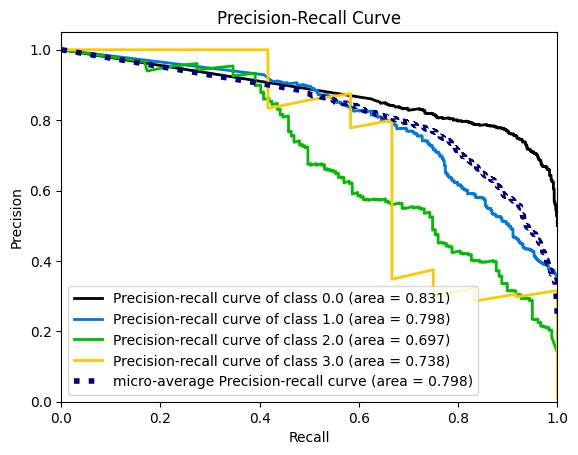

In [136]:
from sklearn.metrics import roc_auc_score
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt

with torch.no_grad():  # deactivate autograd engine to reduce memory usage and speed up computations
            clf.eval()
            if clf.training:
            # it's in train mode
                print("Still Training, validation interference")
            else:
                print("Just Testing")
            
            values_list = np.array([])
            predictions_list = np.array([])
            Soft_list = np.array([[]]).reshape((0,4))

            Softmax = torch.nn.Softmax()
            for data in test_dataloader:
                X_valid,y_valid = data 
                X_valid, y_valid = X_valid.float().to(device), y_valid.to(device)

                valid_outputs = clf(X_valid)
                _, predicted = clf(X_valid).max(1)
                predictions_list = np.concatenate((predictions_list, predicted.to('cpu').numpy()), axis=None)
                
                Soft_out = Softmax(valid_outputs)
                Soft_list = np.concatenate((Soft_list, Soft_out.numpy()), axis=0)
                # print(Soft_list)

                values_list= np.concatenate((values_list, y_valid.numpy()), axis=None)
                
                # break

print(values_list)
print(predictions_list)
print(Soft_list)
# print(values_list)
Max_Soft_List = np.max(Soft_list, axis = 1)
print(Max_Soft_List)
print(predictions_list == values_list)

# Precision = True Positive / (True Positive + False Positive)
# Recall = True Positive / (True Positive + False Negative)

skplt.metrics.plot_precision_recall_curve(values_list, Soft_list)
plt.show()
# roc_auc_score(values_list, Soft_list, multi_class='ovo')


In [ ]:
#ROC Evaluation in Terms of Binary Evaluation (Demented vs. Not Demented)

# Confusion Matrix for Training Data 

(For Confirmation of Training Process)

0
NonDemented
['MildDemented' 'VeryMildDemented' 'VeryMildDemented' ... 'NonDemented'
 'NonDemented' 'NonDemented']
['MildDemented' 'VeryMildDemented' 'VeryMildDemented' ... 'NonDemented'
 'NonDemented' 'NonDemented']


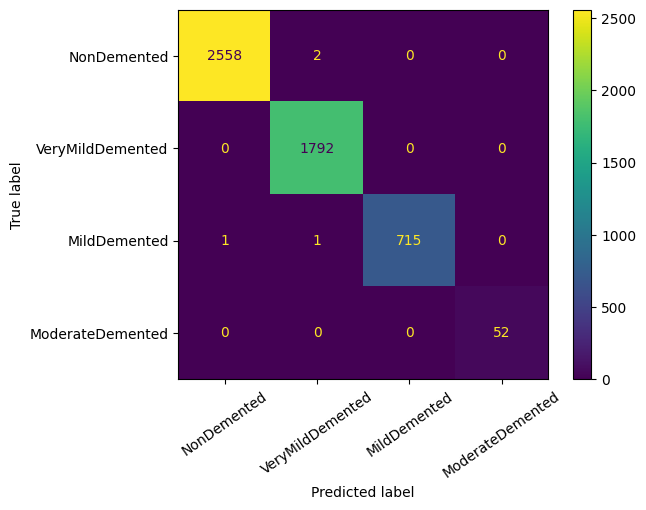

In [ ]:
with torch.no_grad():  # deactivate autograd engine to reduce memory usage and speed up computations
    predictions_list = np.array([])
    total_samples_list = np.array([])
    for data in train_dataloader:
        X,y = data  # replace 'device' with your device, e.g., 'cuda' or 'cpu'
        X, y = X.float().to(device), y.to('cpu')
        total_samples_list = np.concatenate((total_samples_list, y.numpy()), axis=None)
        # print(total_samples_list)

        outputs = clf(X)
        _, predicted = outputs.max(1)
        predictions_list = np.concatenate((predictions_list, predicted.to('cpu').numpy()), axis=None)

total_samples_list=total_samples_list.astype(object)
predictions_list=predictions_list.astype(object)

#Constructs a Confusion Matrix
classes = ["NonDemented", "VeryMildDemented", "MildDemented", "ModerateDemented"]

print(classes.index("NonDemented"))
print(classes[classes.index("NonDemented")])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# y_test = np.array([0,1,2,3,1], dtype=object)
# predictions = np.array([0,1,2,3,0], dtype=object)
for n in range(4):
    total_samples_list[total_samples_list==n] = classes[n]
    predictions_list[predictions_list==n] = classes[n]

print(total_samples_list)
print(predictions_list)
cm = confusion_matrix(total_samples_list, predictions_list, labels=classes)#, labels=classes
ConfusionMatrixDisplay(cm, display_labels=classes).plot(xticks_rotation = 35)


In [ ]:
input = torch.randn(30, 1, 208, 176)

Conv1 = torch.nn.Conv2d(1, 32, (3,3))
Conv1_2 = torch.nn.Conv2d(32, 32, (3,3))
Relu = torch.nn.ReLU()
Max = torch.nn.MaxPool2d(2, stride=2)
Max3 = torch.nn.MaxPool2d(3, stride=3)
# print(m1(input).shape)
Conv2 = torch.nn.Conv2d(32, 64, (3,3))
Conv3 = torch.nn.Conv2d(64, 64, (3,3))
input = Conv1(input)# torch.nn.Conv2d(1, 32, (3,3))
input = Relu(input)# torch.nn.ReLU(),
input = Conv1_2(input)# torch.nn.Conv2d(1, 32, (3,3))
input = Relu(input)# torch.nn.ReLU(),
input = Max3(input)# torch.nn.MaxPool2d(2, stride=2),
input = Conv2(input)# torch.nn.Conv2d(32, 64, (3,3)),
input = Relu(input)# torch.nn.ReLU()
# input = Max(input)# torch.nn.MaxPool2d(2, stride=2)
input = Conv3(input)# torch.nn.Conv2d(64, 64, (3,3))
input = Relu(input)# torch.nn.ReLU()
# input = Conv3(input)# torch.nn.Conv2d(64, 64, (3,3))
input = Relu(input)# torch.nn.ReLU()
input = Max3(input)# torch.nn.MaxPool2d(2, stride=2)

# input = Conv3(input)# torch.nn.Conv2d(32, 64, (3,3)),
# input = Relu(input)# torch.nn.ReLU()
# # input = Max(input)# torch.nn.MaxPool2d(2, stride=2)
# input = Conv3(input)# torch.nn.Conv2d(64, 64, (3,3))
# input = Relu(input)# torch.nn.ReLU()


# torch.nn.Flatten()
#torch.nn.Linear(4*(208-6)*(176-6), 4)
print(input.shape)
print(np.prod(np.array(list(input.shape[1:]))))

torch.Size([30, 64, 21, 17])
22848


In [ ]:
https://www.openfmri.org/dataset/

https://www.aylward.org/notes/open-access-medical-image-repositories

# Source of Website Image, with interesting description:

https://medpix.nlm.nih.gov/case?id=74571d08-b824-401c-bc40-375efe0347a7